In [2]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

train_images = train_images/255
test_images = test_images/255

(60000, 28, 28)
(60000,)


In [4]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
def fashion_name(fashion):
    if fashion == 0:
        return "T-shirt/ Top"
    elif fashion == 1:
        return "Trouser"
    elif fashion == 2:
        return "Pullover"
    elif fashion == 3:
        return "Dress"
    elif fashion == 4:
        return "Coat"
    elif fashion == 5:
        return "Sandal"
    elif fashion == 6:
        return "Shirt"
    elif fashion == 7:
        return "Sneaker"
    elif fashion == 8:
        return "Bag"
    elif fashion == 9:
        return "Ankle boot"

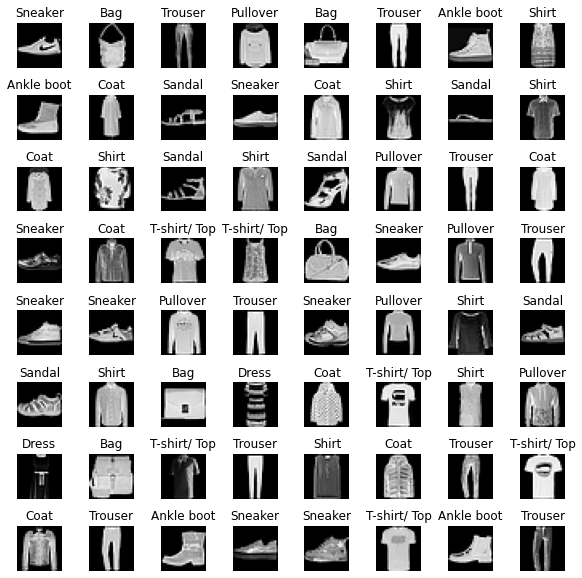

In [6]:
m, h, w = train_images.shape
n = h*w

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(train_images[random_index], cmap='gray')
    
    # Display the label above the image
    ax.set_title(fashion_name(train_labels[random_index]))
    ax.set_axis_off()

In [7]:
# Define the model
model = Sequential([
                                                         
  # Add convolutions and max pooling
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D(2, 2),
  layers.Conv2D(32, (3,3), activation='relu'),
  layers.MaxPooling2D(2,2),

  # Add the same layers as before
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [10]:
# Compile the model
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    verbose=1,
)

Epoch 1/10


1875/1875 [==============================] - 13s 5ms/step - loss: 0.4651 - accuracy: 0.8312
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3161 - accuracy: 0.8838
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2713 - accuracy: 0.8987
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2420 - accuracy: 0.9105
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2178 - accuracy: 0.9189
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1979 - accuracy: 0.9247
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1801 - accuracy: 0.9334
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1647 - accuracy: 0.9385
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1492 - accuracy: 0.9439
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 

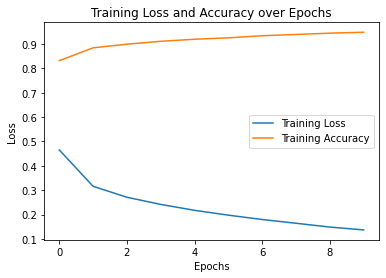

In [11]:
def plot_loss_tf(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.title('Training Loss and Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Use the defined function to plot the loss
plot_loss_tf(history)

1/1 [==============================] - 0s 25ms/step


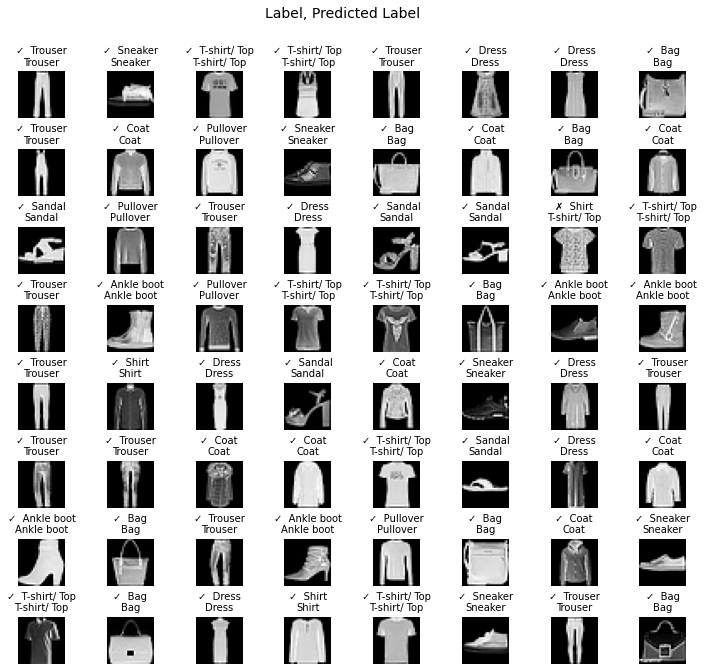

In [19]:
m, h, w = train_images.shape
n = h * w

fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

# Choose Unicode symbols for check mark and cross
tick_mark = u'\u2713'  # Check mark
cross_mark = u'\u2717'  # Cross mark

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(train_images[random_index], cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(train_images[random_index].reshape(1, 28, 28, 1))
    prediction_p = tf.nn.softmax(prediction)
    predicted_labels = np.argmax(prediction_p)

    # Use the chosen symbol based on correctness
    mark_symbol = tick_mark if train_labels[random_index]==predicted_labels else cross_mark
    
    # Display the label above the image
    ax.set_title(f"{mark_symbol}  {fashion_name(train_labels[random_index])}\n{fashion_name(predicted_labels)}", fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, Predicted Label", fontsize=14)
plt.show()

1/1 [==============================] - 0s 34ms/step


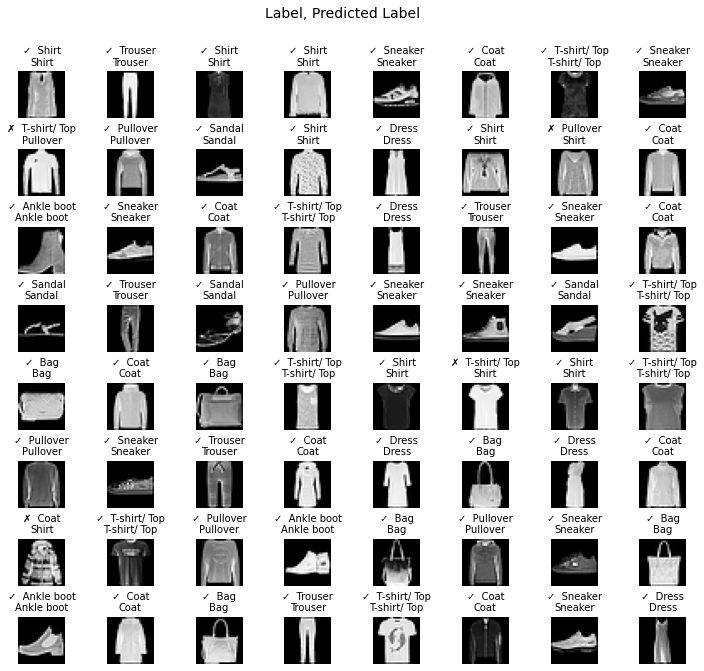

In [16]:
m, h, w = test_images.shape

fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=1,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

# Choose Unicode symbols for check mark and cross
tick_mark = u'\u2713'  # Check mark
cross_mark = u'\u2717'  # Cross mark

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Display the image
    ax.imshow(test_images[random_index], cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(test_images[random_index].reshape(1, 28, 28, 1))
    prediction_p = tf.nn.softmax(prediction)
    predicted_labels = np.argmax(prediction_p)

    # Use the chosen symbol based on correctness
    mark_symbol = tick_mark if test_labels[random_index]==predicted_labels else cross_mark
    
    # Display the label above the image
    ax.set_title(f"{mark_symbol}  {fashion_name(test_labels[random_index])}\n{fashion_name(predicted_labels)}", fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, Predicted Label", fontsize=14)
plt.show()

In [21]:
print(model.evaluate(train_images, train_labels))
print(model.evaluate(test_images, test_labels))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1068 - accuracy: 0.9604
[0.10677830129861832, 0.9604166746139526]
313/313 [==============================] - 1s 2ms/step - loss: 0.2785 - accuracy: 0.9085
[0.2784925401210785, 0.9085000157356262]
